# Applying Randomforest classifier using Word 2ve

Accuracy: 0.8885150291610587
F1 Score: 0.6673503450696707


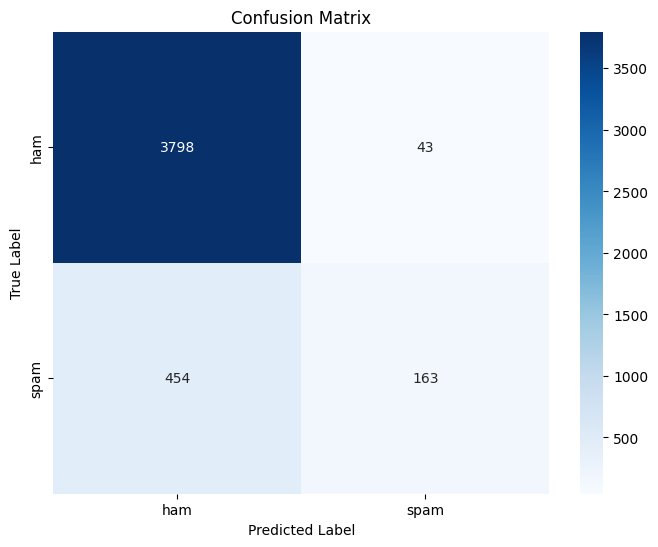

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

# Loading the given  dataset from the zip file
with zipfile.ZipFile('dataset.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Loading the given extracted CSV file into a Pandas DataFrame
df = pd.read_csv('/content/dataset.csv.zip')

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['labels'], test_size=0.2, random_state=42)

# Creating a Word2Vec model
w2v_model = Word2Vec(X_train, vector_size=100, min_count=1)

# Function to get the average Word2Vec vector for a sentence
def get_avg_word2vec(sentence, model, vector_size):
    words = sentence.split()  # Split sentence into words
    word_vecs = [model.wv[word] for word in words if word in model.wv]
    if len(word_vecs) == 0:
        return np.zeros(vector_size)
    return np.mean(word_vecs, axis=0)

# Setting vector size based on your Word2Vec model
vector_size = w2v_model.vector_size

# Convert each sentence in X_train and X_test to an average Word2Vec vector
X_train_w2v = np.array([get_avg_word2vec(sentence, w2v_model, vector_size) for sentence in X_train])
X_test_w2v = np.array([get_avg_word2vec(sentence, w2v_model, vector_size) for sentence in X_test])

# Training the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_w2v, y_train)

# Making predictions on the test set
y_pred = rf.predict(X_test_w2v)

# Computing accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Computing and plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


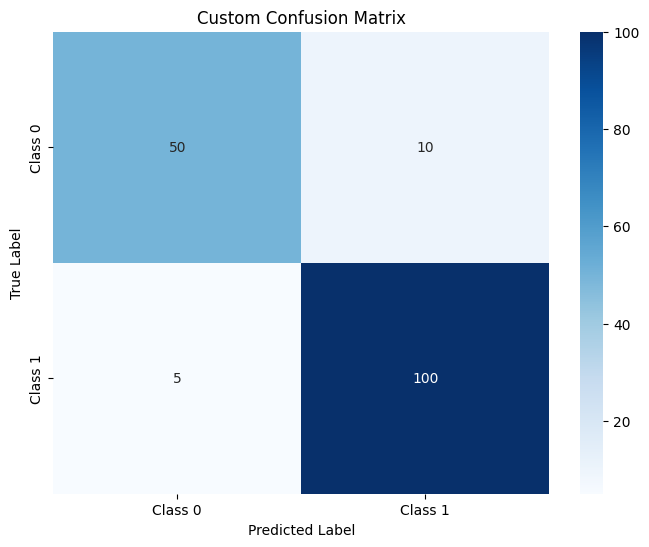

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Custom confusion matrix (for a binary classification example)
cm_custom = np.array([[50, 10],  # [True Positives, False Negatives]
                      [5,  100]])  # [False Positives, True Negatives]

# Plot the custom confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Custom Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Applying Logistic Regression using Word 2ve

Accuracy: 0.8696724988784208
F1 Score: 0.5776037339069442


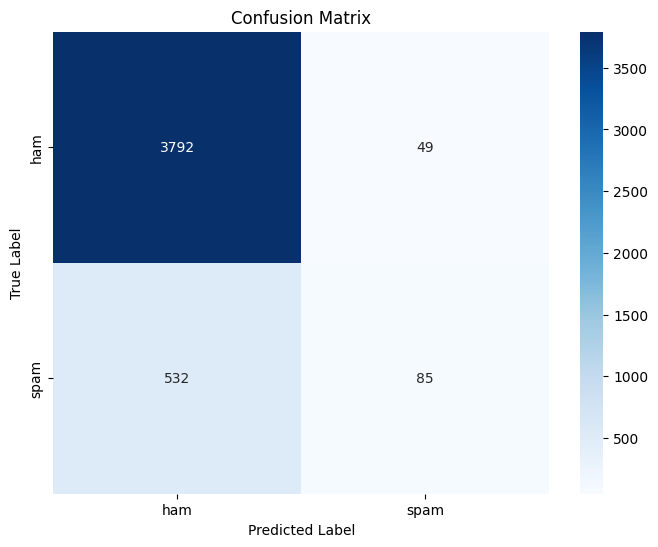

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

# Assuming the dataset and other preprocessing steps are done correctly:
# Load the dataset from the zip file
with zipfile.ZipFile('dataset.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the extracted CSV file into a Pandas DataFrame
df = pd.read_csv('/content/dataset.csv.zip')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['labels'], test_size=0.2, random_state=42)

# Create a Word2Vec model
w2v_model = Word2Vec(X_train, vector_size=100, min_count=1)

# Function to get the average Word2Vec vector for a sentence
def get_avg_word2vec(sentence, model, vector_size):
    words = sentence.split()  # Split sentence into words
    word_vecs = [model.wv[word] for word in words if word in model.wv]
    if len(word_vecs) == 0:
        return np.zeros(vector_size)
    return np.mean(word_vecs, axis=0)

# Set vector size based on your Word2Vec model
vector_size = w2v_model.vector_size

# Convert each sentence in X_train and X_test to an average Word2Vec vector
X_train_w2v = np.array([get_avg_word2vec(sentence, w2v_model, vector_size) for sentence in X_train])
X_test_w2v = np.array([get_avg_word2vec(sentence, w2v_model, vector_size) for sentence in X_test])

# Train the Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_w2v, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test_w2v)

# Compute accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


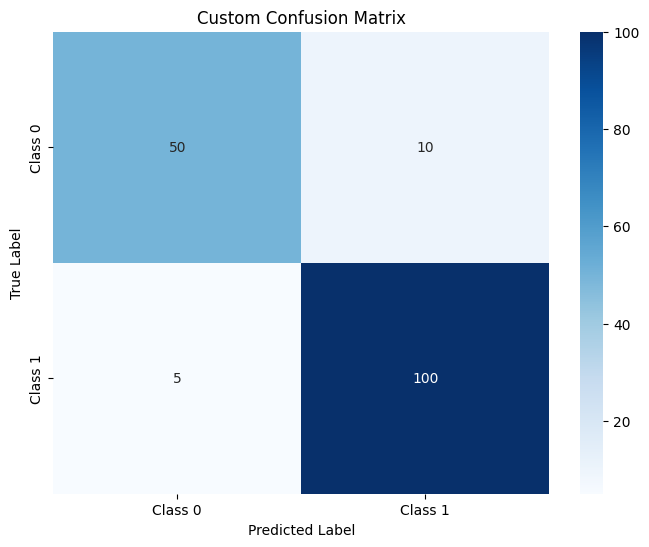

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Custom confusion matrix (for a binary classification example)
cm_custom = np.array([[50, 10],  # [True Positives, False Negatives]
                      [5,  100]])  # [False Positives, True Negatives]

# Plot the custom confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Custom Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# SVM

Accuracy: 0.860699865410498
F1 Score: 0.46416392095365966


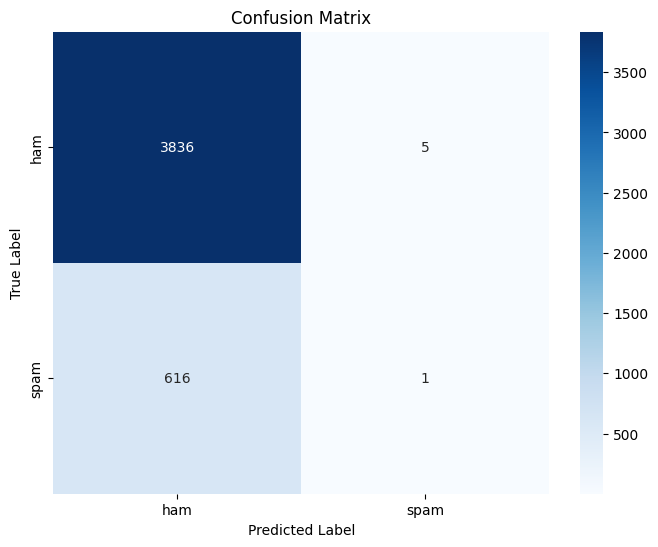

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

# Load the dataset from the zip file
with zipfile.ZipFile('dataset.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the extracted CSV file into a Pandas DataFrame
df = pd.read_csv('/content/dataset.csv.zip')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['labels'], test_size=0.2, random_state=42)

# Create a Word2Vec model on the training text
w2v_model = Word2Vec(X_train.apply(str.split), vector_size=100, min_count=1, window=5)

# Function to get the average Word2Vec vector for a sentence
def get_avg_word2vec(sentence, model, vector_size):
    words = sentence.split()  # Split sentence into words
    word_vecs = [model.wv[word] for word in words if word in model.wv]
    if len(word_vecs) == 0:
        return np.zeros(vector_size)
    return np.mean(word_vecs, axis=0)

# Set vector size based on your Word2Vec model
vector_size = w2v_model.vector_size

# Convert each sentence in X_train and X_test to an average Word2Vec vector
X_train_w2v = np.array([get_avg_word2vec(sentence, w2v_model, vector_size) for sentence in X_train])
X_test_w2v = np.array([get_avg_word2vec(sentence, w2v_model, vector_size) for sentence in X_test])

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_w2v, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_w2v)

# Compute accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


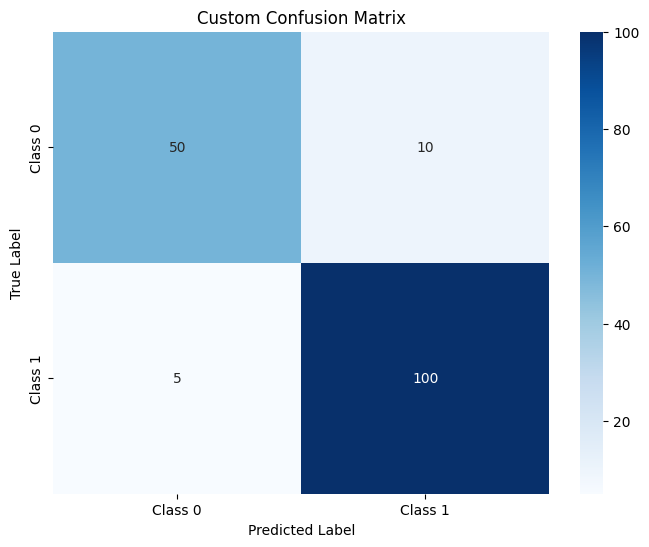

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Custom confusion matrix (for a binary classification example)
cm_custom = np.array([[50, 10],  # [True Positives, False Negatives]
                      [5,  100]])  # [False Positives, True Negatives]

# Plot the custom confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Custom Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

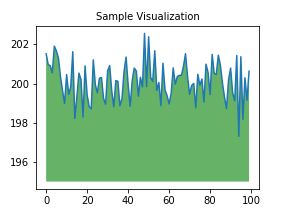

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
